In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold
from tqdm import tqdm
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import lightgbm as lgb
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier

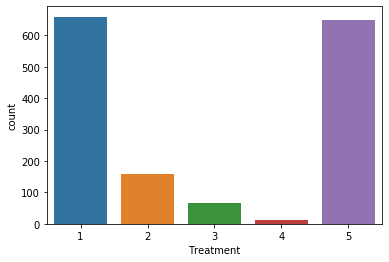

In [2]:
data = pd.read_feather('finalData.ft')
columns=data.columns
labels=data['Treatment']
data = data.drop(('Treatment'),axis=1)
data = data.to_numpy()
sns.countplot(labels)

In [3]:
newData=[]
newLabels=[]
n=len(labels)
for c in range(0,n,1):
    point=labels[c]
    if(point==2):
        newData.append(data[c])
        newLabels.append(0)
    elif(point==3):
        newData.append(data[c])
        newLabels.append(1)

newData=np.asarray(newData)
newLabels=np.asarray(newLabels)
print(newData.shape)
print(labels.shape)
print(newLabels.shape)

(225, 34)
(1546,)
(225,)


In [4]:
folds= KFold(n_splits=4, shuffle=True)
accuracies=[]
labels15=np.asarray(newLabels)
data15=np.asarray(newData)
bestClassifier15=lgb.LGBMClassifier(boosting_type='gbdt')
bestScore=0
for (train_index, test_index) in tqdm(folds.split(data15,labels15)):
    xtrain , ytrain = data15[train_index.astype(int)] , labels15[train_index.astype(int)]
    xtest , ytest = data15[test_index.astype(int)] , labels15[test_index.astype(int)]
    
    classifier15 = lgb.LGBMClassifier(boosting_type='gbdt')
    classifier15.fit(xtrain , ytrain)
    predicted = classifier15.predict(xtest)
    accuracy = accuracy_score(ytest,predicted)
    if(accuracy>bestScore):
        bestScore=accuracy
        bestClassifier15=classifier15
    print(confusion_matrix(ytest,predicted))
    accuracies.append(accuracy)
    print(accuracy)
    
print(sum(accuracies)/len(accuracies))

0it [00:00, ?it/s]

[[38  1]
 [10  8]]
0.8070175438596491
[[36  4]
 [ 7  9]]
0.8035714285714286
[[34  7]
 [10  5]]
0.6964285714285714


3it [00:00, 27.35it/s]

[[36  4]
 [ 6 10]]
0.8214285714285714


4it [00:00, 26.21it/s]


0.782111528822055
